In [578]:
import random
import numpy as np
import networkx as nx 
from dijkstar import Graph, find_path

In [579]:
def generate_instance_matrix(nb_vertex, min_weight, max_weight, density):
  graph = np.ones((nb_vertex, nb_vertex)) * np.inf
  for i in range(nb_vertex - 1):
    for j in range(i+1, nb_vertex):
      if random.uniform(0, 1) < density:
        weight = random.randint(min_weight, max_weight)
        graph[i, j] = weight
        graph[j, i] = weight
  for i,line in enumerate(graph):
    index_zeros = np.where(line == np.inf)[0]
    index_zeros = np.delete(index_zeros, np.where(index_zeros == i))
    for j in range(len(index_zeros) - (nb_vertex - 3)):
      index = random.choice(index_zeros)
      index_zeros = np.delete(index_zeros, np.where(index_zeros == index))
      weight = random.randint(min_weight, max_weight)
      graph[i, index] = weight
      graph[index, i] = weight
  return graph

def convert_graph(graph):
  graph_dijkstra = Graph()
  for i in range(len(graph)):
    for j in range(len(graph)):
      graph_dijkstra.add_edge(i, j,graph[i][j])
  return graph_dijkstra

def get_distance_between_nodes(graph, i, j):
  if (graph[i][j] != np.inf):
    return graph[i][j], [i, j]
  else:
    if i != j:
      shortest_path = find_path(graph, i,j)
      return shortest_path.total_cost, shortest_path.nodes
    else:
      return 0, None

def get_complete_graph(graph, node_list):
  all_paths = {}
  converted_graph = convert_graph(graph)
  complete_graph = np.zeros((len(node_list), len(node_list)))
  for i in node_list:
    voisins_array = np.delete(node_list, np.where(node_list == i))
    for j in voisins_array:
      distance, path = get_distance_between_nodes(converted_graph, i, j)
      converted_graph_i = np.where(node_list == i)[0][0]
      converted_graph_j = np.where(node_list == j)[0][0]
      complete_graph[converted_graph_i][converted_graph_j] = distance
      all_paths[(converted_graph_i, converted_graph_j)] = path
  return complete_graph, all_paths

def get_random_vertex(size, nb_vertex):
  random_vertex = []
  all_vertex = np.array(range(size))
  for _ in range(nb_vertex):
    value = random.choice(all_vertex)
    random_vertex.append(value)
    all_vertex = np.delete(all_vertex, np.where(all_vertex == value))
  return np.array(random_vertex)

def generate_interval():
  interval = random.choice(range(1,4))
  shift = random.choice(range(0, 11-interval))
  return(shift*60, (shift+interval)*60)

def generate_instance(nb_vertex_matrix, min_weight, max_weight, density, random_vertex):
  graph = generate_instance_matrix(nb_vertex_matrix, min_weight, max_weight, density)
  complete_graph, all_paths = get_complete_graph(graph, random_vertex)
  return graph, complete_graph, all_paths

def get_complete_path(path, all_paths):
  complete_path = []
  for i in range(len(path) - 1):
    complete_path.extend(all_paths[(path[i], path[i+1])][:-1])
    if i == len(path) - 2:
      complete_path.append(all_paths[(path[i], path[i+1])][-1])
  return complete_path

def is_path_in_interval(path, complete_graph, interval, vertex):
  weight = 0
  for i in range(np.where(np.array(path) == vertex)[0][0]):
    weight += complete_graph[path[i]][path[i+1]]
  if weight >= interval[0] and weight <= interval[1]:
    return True
  else:
    return False

def generate_neighbours(path, complete_graph, interval, vertex):
  neighbours = []
  for i in range(len(path)):
    for j in range(i + 1, len(path)-1):
      new_neighbour = path.copy()

      new_neighbour[i] = path[j]
      new_neighbour[j] = path[i]
      
      if is_path_in_interval(new_neighbour, complete_graph, interval, vertex) and new_neighbour[0] == new_neighbour[-1]:
        neighbours.append(new_neighbour)
  return neighbours

def generate_random_path(nb_vertex, start_vertex):
  path = np.arange(nb_vertex)
  path = np.delete(path, np.where(path == start_vertex))
  np.random.shuffle(path)
  path = np.append(path, start_vertex)
  path = np.insert(path, 0, start_vertex)
  return path



In [580]:
import pickle
with open("data.pickle", "rb") as file:
  data = pickle.load(file)


graph = data["graph"]
complete_graph = data["complete_graph"]
all_paths = data["all_paths"]
vertices_list = data["vertices_list"]
start_vertex = data["start_vertex"]
start_vertex_index = data["start_vertex_index"]
interval_vertex = data["interval_vertex"]
interval_vertex_index = data["interval_vertex_index"]
interval = data["interval"]

path = generate_random_path(len(vertices_list), start_vertex_index)
print(path)


[46 32  6  0 35 34 36 44 27 10  8 45  2 29  1 42 37 15 11 26 33 13 18 40
 21 24 38 14 41 20 49 48 28 39  4 25 30  5  7  3 43 19 22 23  9 31 47 17
 12 16 46]


In [581]:
# generate the neighbours of a path

neighbours = generate_neighbours(path, complete_graph, interval, interval_vertex_index)
print(neighbours)


[array([46,  6, 32,  0, 35, 34, 36, 44, 27, 10,  8, 45,  2, 29,  1, 42, 37,
       15, 11, 26, 33, 13, 18, 40, 21, 24, 38, 14, 41, 20, 49, 48, 28, 39,
        4, 25, 30,  5,  7,  3, 43, 19, 22, 23,  9, 31, 47, 17, 12, 16, 46],
      dtype=int64), array([46,  0,  6, 32, 35, 34, 36, 44, 27, 10,  8, 45,  2, 29,  1, 42, 37,
       15, 11, 26, 33, 13, 18, 40, 21, 24, 38, 14, 41, 20, 49, 48, 28, 39,
        4, 25, 30,  5,  7,  3, 43, 19, 22, 23,  9, 31, 47, 17, 12, 16, 46],
      dtype=int64), array([46, 35,  6,  0, 32, 34, 36, 44, 27, 10,  8, 45,  2, 29,  1, 42, 37,
       15, 11, 26, 33, 13, 18, 40, 21, 24, 38, 14, 41, 20, 49, 48, 28, 39,
        4, 25, 30,  5,  7,  3, 43, 19, 22, 23,  9, 31, 47, 17, 12, 16, 46],
      dtype=int64), array([46, 34,  6,  0, 35, 32, 36, 44, 27, 10,  8, 45,  2, 29,  1, 42, 37,
       15, 11, 26, 33, 13, 18, 40, 21, 24, 38, 14, 41, 20, 49, 48, 28, 39,
        4, 25, 30,  5,  7,  3, 43, 19, 22, 23,  9, 31, 47, 17, 12, 16, 46],
      dtype=int64), array([46, 36, 

In [582]:
from pulp import *
import numpy as np


X=[]
P = []
X_dict = {}
True_tab = []



# variables du problème
for i in range(len(complete_graph)):
    for j in range(len(complete_graph)):
        X.append(LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger))
        X_dict[("X_" + str(i) + "_" + str(j))] = LpVariable("X_" + str(i) + "_" + str(j), 0, 1, LpInteger)
        P.append(complete_graph[i][j])

# probleme
prob = LpProblem("plus court chemin", LpMinimize)

# objectif
# Somme de la multiplication des poids de chaque arc
prob += lpSum([P[i] * X[i] for i in range(len(P))])

# contraintes
# La somme d'un arc doit etre egale a 1
X_np = np.array(X)
X_np_reshape = X_np.reshape(len(complete_graph), len(complete_graph))

for i in range(len(X_np_reshape)):
    prob += lpSum(X_np_reshape[i]) == 1
    prob += X_np_reshape[i][i] == 0
    for j in range(len(X_np_reshape)):
        if i != j:
            prob += X_np_reshape[i][j] + X_np_reshape[j][i] <= 1


prob.solve()
print(LpStatus[prob.status])
print("Min=", value(prob.objective))

# variables resultat
for v in prob.variables():
    print("%s=%.2f"%(v.name,v.varValue), end=', ')


c:\Users\adrie\Desktop\adrien\perso\Algo_Avance\Algo_avance\env\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal
Min= 625.0
X_0_0=0.00, X_0_1=0.00, X_0_10=0.00, X_0_11=0.00, X_0_12=0.00, X_0_13=0.00, X_0_14=0.00, X_0_15=0.00, X_0_16=0.00, X_0_17=0.00, X_0_18=0.00, X_0_19=0.00, X_0_2=1.00, X_0_20=0.00, X_0_21=0.00, X_0_22=0.00, X_0_23=0.00, X_0_24=0.00, X_0_25=0.00, X_0_26=0.00, X_0_27=0.00, X_0_28=0.00, X_0_29=0.00, X_0_3=0.00, X_0_30=0.00, X_0_31=0.00, X_0_32=0.00, X_0_33=0.00, X_0_34=0.00, X_0_35=0.00, X_0_36=0.00, X_0_37=0.00, X_0_38=0.00, X_0_39=0.00, X_0_4=0.00, X_0_40=0.00, X_0_41=0.00, X_0_42=0.00, X_0_43=0.00, X_0_44=0.00, X_0_45=0.00, X_0_46=0.00, X_0_47=0.00, X_0_48=0.00, X_0_49=0.00, X_0_5=0.00, X_0_6=0.00, X_0_7=0.00, X_0_8=0.00, X_0_9=0.00, X_10_0=0.00, X_10_1=0.00, X_10_10=0.00, X_10_11=0.00, X_10_12=0.00, X_10_13=0.00, X_10_14=0.00, X_10_15=0.00, X_10_16=0.00, X_10_17=0.00, X_10_18=0.00, X_10_19=0.00, X_10_2=0.00, X_10_20=0.00, X_10_21=0.00, X_10_22=0.00, X_10_23=0.00, X_10_24=0.00, X_10_25=0.00, X_10_26=0.00, X_10_27=0.00, X_10_28=0.00, X_10_29=0.00, X_10_3=0.00, X_10_30=0

In [588]:
nb_iterations=10000 #Dans la boucle while de la boucle principale
T0 = 3000 #Température de départ
Tmin = 1e-2 #Température minimale
tau = 1e4 #Pour la loi de refroidissement


In [589]:
def distance_tot(matrice,path_matrix):
    distance_tot = 0
    ind = 2
    points = [0,0]
    for i in range(len(path_matrix)):
        if i == 0:
            points = path_matrix[0:2]
            distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
        else:
            if (ind <= len(matrice)):
                points = path_matrix[ind-1:ind+1]
                distance_tot += get_distance_between_nodes(matrice,points[0],points[1])[0]
                ind += 1
    return distance_tot

print(distance_tot(complete_graph,path))


1733.0


In [592]:
from ipywidgets import IntProgress 
from IPython.display import display

def recuit_simule_matrix(matrix,path):
    bar = IntProgress(min=0, max=nb_iterations, layout={"width" : "100%"})
    display(bar)
    i_tab = []
    T_Tab = []
    distance_tab = []

    distance = distance_tot(matrix,path)
    solution = np.copy(path)
    i = 0
    T=T0

    while T>Tmin and i<nb_iterations:
        i_tab.append(i)
        T_Tab.append(T)
        distance_tab.append(distance)
        i+=1

        #Loi de refroidissement
        T = T0 * np.exp(-i/tau)

        solution_voisine = neighbours[np.random.randint(0, len(neighbours))]
        
        while is_path_in_interval(solution_voisine, matrix, interval, 3) == False:
            solution_voisine = neighbours[np.random.randint(0, len(neighbours))]

        #Création de la nouvelle solution proche de la precedente
        

        #Comparaison des deux valeurs
        difference = distance_tot(matrix,solution) - distance_tot(matrix,solution_voisine)

        # Si la nouvelle solution est meilleure, on la prend
        if difference > 0:
            solution = solution_voisine
            distance = distance_tot(matrix,solution_voisine)
        
        # Sinon, on prend la solution actuelle
        else:
            if np.random.uniform() > np.exp(-difference/T): #on accepte la solution avec une certaine probabilité. 
                solution=solution_voisine
                distance=distance_tot(matrix,solution_voisine)
        
        print(i,T,distance)
        bar.value += 1
    bar.close()
    return solution,distance,i_tab,T_Tab,distance_tab
    

solution, distance, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path)


# Make a multistart of recuit_simule_matrix
for _ in range (500):  
    path = generate_random_path(len(vertices_list), start_vertex_index)
    solution_courante, distance_courante, i_tab, T_tab, distance_tab = recuit_simule_matrix(complete_graph,path)
    if distance_courante < distance:
        solution = solution_courante
        distance = distance_courante
        i_tab = i_tab
        T_tab = T_tab
        distance_tab = distance_tab
print(solution)


IntProgress(value=0, layout=Layout(width='100%'), max=10000)

1 2999.7000149995 1702.0
2 2999.4000599960004 1702.0
3 2999.100134986501 1695.0
4 2998.800239968003 1695.0
5 2998.500374937508 1695.0
6 2998.2005398920164 1695.0
7 2997.90073482853 1695.0
8 2997.600959744051 1695.0
9 2997.3012146355823 1695.0
10 2997.001499500125 1695.0
11 2996.7018143346827 1695.0
12 2996.4021591362593 1695.0
13 2996.102533901857 1695.0
14 2995.80293862848 1695.0
15 2995.5033733131327 1695.0
16 2995.203837952819 1695.0
17 2994.9043325445436 1695.0
18 2994.604857085312 1695.0
19 2994.3054115721284 1695.0
20 2994.0059960019994 1695.0
21 2993.70661037193 1684.0
22 2993.407254678927 1684.0
23 2993.1079289199965 1684.0
24 2992.808633092145 1684.0
25 2992.50936719238 1684.0
26 2992.210131217709 1684.0
27 2991.9109251651394 1684.0
28 2991.6117490316788 1684.0
29 2991.3126028143356 1684.0
30 2991.013486510119 1684.0
31 2990.714400116037 1684.0
32 2990.4153436290985 1684.0
33 2990.116317046314 1684.0
34 2989.817320364693 1684.0
35 2989.518353581245 1684.0
36 2989.21941669298 1

KeyboardInterrupt: 

Au bout de  1000 itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :
46 ->
32 ->
6 ->
0 ->
35 ->
34 ->
36 ->
44 ->
27 ->
10 ->
41 ->
45 ->
2 ->
29 ->
1 ->
42 ->
37 ->
15 ->
11 ->
26 ->
33 ->
13 ->
18 ->
40 ->
21 ->
24 ->
38 ->
14 ->
8 ->
20 ->
49 ->
48 ->
28 ->
39 ->
4 ->
25 ->
30 ->
5 ->
7 ->
3 ->
43 ->
19 ->
22 ->
23 ->
9 ->
31 ->
47 ->
17 ->
12 ->
16 ->
46 ->
La distance parcourue de la 1ere liste était de  1733.0 km.
La distance parcourue au total est de  1649.0 km.


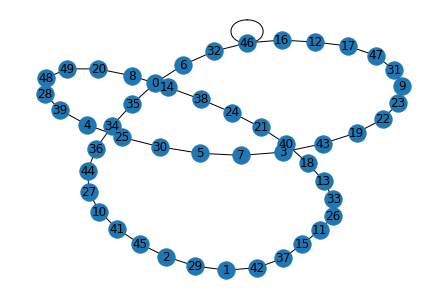

In [586]:
def afficher_villes(liste):
    for i in range(0,len(liste)):
        print(liste[i],"->")

print ("Au bout de ",nb_iterations,"itérations, la meilleure solution avec le mélange simple est de visiter les villes dans cet ordre :")
afficher_villes(solution)

print("La distance parcourue de la 1ere liste était de ", distance_tot(complete_graph,path), "km.")
print("La distance parcourue au total est de ", distance_tot(complete_graph,solution), "km.") 

tab_path_real = get_complete_path(solution, all_paths)

G = nx.Graph()
G.add_nodes_from(solution)
for i in range(len(solution)):
    G.add_edge(solution[i],solution[(i+1)%len(solution)])


nx.draw(G, with_labels=True)

1000
1000
1000


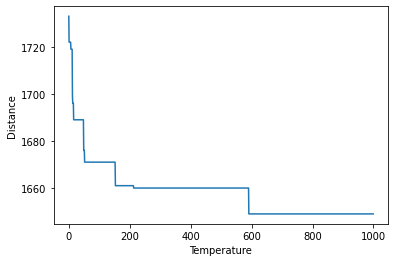

In [587]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot


print(len(i_tab))
print(len(T_tab))
print(len(distance_tab))

# plot T_tab vs distance_tab
pyplot.plot(distance_tab)


pyplot.xlabel('Temperature')
pyplot.ylabel('Distance')
pyplot.show()